# QuantEcon - [An Introductory Example](http://quant-econ.net/jl/julia_by_example.html)

This is just the first intro example in the QE site.  I have never done much with Julia, so this is a tutorial.  Here are the packages currently installed.

In [1]:
Pkg.status()

5 required packages:
 - Gadfly                        0.3.13
 - IJulia                        0.2.5
 - Images                        0.4.39
 - Jewel                         1.0.4
 - QuantEcon                     0.1.2
57 additional packages:
 - ArrayViews                    0.6.2
 - BinDeps                       0.3.14
 - Blosc                         0.1.2
 - Calculus                      0.1.8
 - Codecs                        0.1.4
 - Color                         0.4.5
 - Compat                        0.4.9
 - Compose                       0.3.13
 - Contour                       0.0.7
 - DSP                           0.0.8
 - DataArrays                    0.2.16
 - DataFrames                    0.6.7
 - DataStructures                0.3.10
 - Dates                         0.3.2
 - Distances                     0.2.0
 - Distributions                 0.7.4
 - Docile                        0.5.11
 - DualNumbers                   0.1.3
 - FactCheck                     0.2.8
 - FixedPoin

## Plotting White Noise

This appears to just be a plotting exercise.  As can be seen above, we do not yet have [PyPlot](https://github.com/stevengj/PyPlot.jl), so let's make that happen.

In [2]:
Pkg.add("PyPlot")

INFO: Cloning cache of LaTeXStrings from git://github.com/stevengj/LaTeXStrings.jl.git
INFO: Cloning cache of PyCall from git://github.com/stevengj/PyCall.jl.git
INFO: Cloning cache of PyPlot from git://github.com/stevengj/PyPlot.jl.git
INFO: Installing LaTeXStrings v0.1.3
INFO: Installing PyCall v0.8.1
INFO: Installing PyPlot v1.5.3
INFO: Package database updated


Now we can proceed.  All we are going to do is generate a hundred random values, and plot them as a line chart.

[-0.13346649969458024,-1.0161841124052517,1.1652649746116264,0.023904279996016083,2.204085103785219,0.8527501646071197,-0.8276322328617226,1.091891750286549,0.385844902082187,-1.5773977204674476,0.4926129004276423,-1.1946977337916997,-1.1993508908403694,1.7514327676692936,-0.6114360364126226,0.4940062579280295,0.9763853823850174,-0.3061512438267622,0.6205194771532033,0.330373665875207,-1.0032072870141673,0.38094507779496645,-1.630086326727843,1.4055629015982776,-0.33856910510013033,-1.1507830719625973,-0.46977725232759027,0.7540679702111328,0.25559547452042236,-2.1052055430750625,0.6676552629252561,2.1235087734417006,-1.0723789077678425,-1.0780880094645697,-1.8733655159314915,-0.45597342352994286,1.4801137912499738,0.1596622140476189,-1.0983483746964067,0.8798456432565367,-0.41222693341573396,-0.9619689434381619,-0.07593437036330074,1.180365603851855,-0.19885797627610174,-0.7591550555553149,-0.4022138230711267,-0.40901237587635886,0.4783943516694933,1.5383659596422556,-0.43202701443760

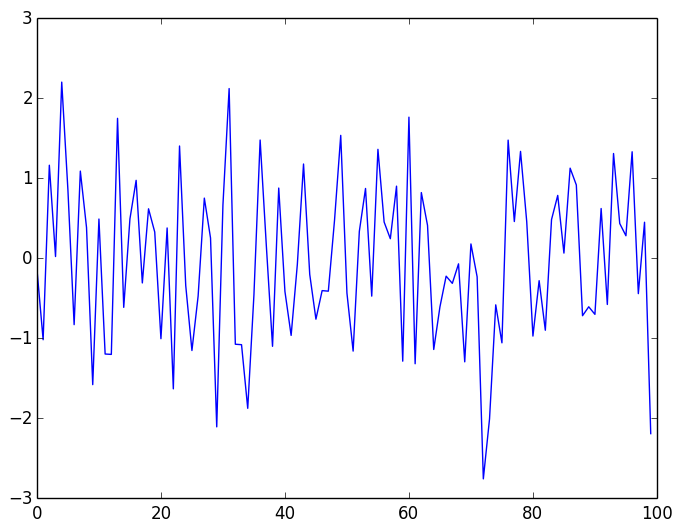

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002F2EB208>

In [4]:
#Import plotting library
using PyPlot

#Set number of time periods
ts_length=100

#Generate a vector of random numbers (using latex just because we can)
ϵ_vals=randn(ts_length)
println(ϵ_vals)

#Plot random values (note that we are setting a style parameter a la matplotlib)
plot(ϵ_vals,"b-")

Interesting.  Note that strings require double quotes.  Single quotes cause an exception.  Note also that `randn` is just a function from the standard library (whereas this would be pulled from **`numpy`** in Python).

If we had wanted only the `plot()` function instead of all methods associated with **`PyPlot`**, we would replace `using PyPlot` with `import PyPlot: plot`.

What kind of object is holding our random values?

In [5]:
typeof(ϵ_vals)

Array{Float64,1}

An array, much like that found in **`numpy`**, *except* that they can hold heterogenous data collections.  Observe....

In [8]:
x=[10,"foo",false]

3-element Array{Any,1}:
    10     
      "foo"
 false     

`x` is holding an integer, a string, and a boolean.

In [10]:
[typeof(var) for var in x]

3-element Array{Type{_},1}:
 Int64      
 ASCIIString
 Bool       

Yes!  Comprehensions work.  That was a stab in the dark.  Anyway, it demonstrates what I was talking about.  As one might expect, these arrays are indexed and can be parsed by their integer positions.  *However, Julia uses a unity-based, as opposed to zero-based, indexing system.*

Note that there are some standard array methods we would expect to find...

In [11]:
println(length(x))
pop!(x)
push!(x,"bar")

3


3-element Array{Any,1}:
 10     
   "foo"
   "bar"

As can be seen, arrays can be treated as stacks, just like Python lists.  `pop!` knocks off the last element, and `push!` stacks something on the end.